# Import module

In [1]:
import pdfplumber
import jieba
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from scipy.ndimage import gaussian_gradient_magnitude
import imageio
import pandas as pd

# Read PDF file and transform to text

In [2]:
PDF_file = './test.pdf'
PDF = pdfplumber.open(PDF_file)
print('No. of all the pages: ',len(PDF.pages))

count = 0
text=''
# choose the range of the pages you need
for x in range(354,388):
    page = PDF.pages[x]
    text += page.extract_text()
    count += 1
print('The pages we needto transform to text: ',count)
print('len of text: ', len(text))

No. of pages:  409
Read pages to text 34
len of text 38764


# Use jieba to cut the text and change to list

In [3]:
text_list = jieba.lcut(text, cut_all=False)
print(type(text_list))
print(len(text_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\eric\AppData\Local\Temp\jieba.cache
Loading model cost 0.550 seconds.
Prefix dict has been built succesfully.


<class 'list'>
22228


# Remove the words we don't need

In [4]:
new_list=[]
def remove_stop_words(file_name,seg_list):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    for seg in seg_list:
        if seg not in stop_words:
            if seg != '\n' and seg != ' ' and seg != 'on' and seg != 'te' and seg != 'le' and seg != 'en' and seg != 'Co' and seg != ',':
                new_list.append(seg)
    return new_list
#The words you want to remove is based on the words in this document
file_name = './test.txt'
seg_list = remove_stop_words(file_name,text_list)
print(len(seg_list))

12853


In [5]:
#統計詞頻
def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['text'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('text')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

sef_freq = count_segment_freq(seg_list)
sef_freq.reset_index(inplace = True)
#print the 50 most popular words
print(sef_freq.head(50))

#The file where you want to write the result
file_path = './count.xlsx'
writer = pd.ExcelWriter(file_path)
sef_freq.to_excel(writer, columns=['text','count'], index=False,encoding='utf-8',sheet_name='Sheet')
writer.save()

    text  count
0     醫療    186
1     技術    176
2     AI    158
3     發展    148
4     智慧    127
5     應用    121
6     服務    107
7     資料    106
8     產業     94
9     科技     89
10    運動     81
11    分析     80
12    影像     79
13    整合     76
14    數據     66
15    提升     64
16    行銷     61
17    我國     56
18    研發     55
19    平台     54
20    模式     53
21    需求     50
22    創新     48
23    系統     48
24    資安     47
25    領域     46
26    市場     45
27    企業     44
28    提供     41
29    安全     39
30    健身     38
31    方案     38
32  2020     38
33    智能     37
34    資訊     36
35    客戶     35
36    解決     33
37    學習     33
38     務     31
39    輔助     31
40    場域     31
41    數位     31
42    產品     30
43    管理     30
44    導入     30
45    休閒     30
46    全球     30
47    商業     30
48    體驗     29
49    相關     29


In [6]:
wc_list=' '.join(seg_list)
# Mask image
mask_color = np.array(Image.open('./test.jpg'))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255

# Edge detection
edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255

#change the pic
#mask=mask_image,
wc = WordCloud(max_words=500,
               font_path='C:/Windows/Fonts/kaiu.ttf',
               max_font_size=65,
               min_font_size=10,
               scale=20,
               background_color='white',
               prefer_horizontal=0.9,
               random_state=None,
               relative_scaling=1)

wc.generate(wc_list)

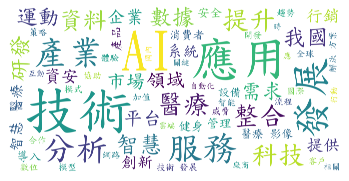

In [7]:
# Plot
plt.axis('off')
plt.imshow(wc)
plt.show()
wc.to_file("C:/Users/eric/Desktop/wc.jpg")